In [ ]:
pip install langgraph langchain-openai langchain-groq

In [2]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from typing import Literal

from langgraph.graph import StateGraph, START, END

#reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [15]:
class State(TypedDict):
  messages : Annotated[list, add_messages]

In [3]:
import os
os.environ["OPENAI_API_KEY"] = "your api key"
os.environ["GROQ_API_KEY"] = "your api key"

In [ ]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = "gpt-4o")

In [4]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model = "qwen/qwen3-32b")

In [13]:
def chatbot(state : State):
  return {"messages" : [llm_groq.invoke(state["messages"])]}

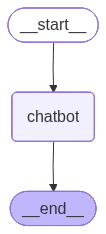

In [16]:
graph = StateGraph(State)

graph.add_node("chatbot", chatbot)

graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [19]:
graph_builder.invoke({'messages': "Hi I am Rama, I like Cricket"})

{'messages': [HumanMessage(content='Hi I am Rama, I like Cricket', additional_kwargs={}, response_metadata={}, id='89a09475-e550-41eb-926b-b3974e20481c'),
  AIMessage(content="<think>\nOkay, the user just introduced themselves as Rama and mentioned they like cricket. Let me think about how to respond appropriately. First, I should acknowledge their introduction and show interest in their hobby. Since cricket is a popular sport, maybe I can ask about their favorite team or player to keep the conversation going. I should also check if there's any specific aspect of cricket they're passionate about, like playing it or just watching. Keeping the response friendly and open-ended would be best. Let me make sure the tone is welcoming and not too formal. Alright, that should work.\n</think>\n\nHi Rama! 🏏 It's great to meet you. Cricket is such an exciting sport—do you follow any particular team or player closely? Or do you play yourself? I'd love to hear more about what you enjoy most about th

In [22]:
for event in graph_builder.stream({"messages":"Hi,I am Rama,How are you today"}, stream_mode = "values"):
  print(event)

{'messages': [HumanMessage(content='Hi,I am Rama,How are you today', additional_kwargs={}, response_metadata={}, id='9fc82509-0c15-47a8-8e41-13ae7eccbab1')]}
{'messages': [HumanMessage(content='Hi,I am Rama,How are you today', additional_kwargs={}, response_metadata={}, id='9fc82509-0c15-47a8-8e41-13ae7eccbab1'), AIMessage(content='<think>\nOkay, the user\'s name is Rama, and they greeted me with "Hi, I am Rama, How are you today." They\'re probably looking for a friendly response to start a conversation. I should make sure to acknowledge their greeting warmly and respond in a conversational tone.\n\nFirst, I\'ll thank them for reaching out and mention that I\'m doing well. Then, I\'ll ask how they\'re doing to keep the conversation going. It\'s important to be polite and show genuine interest in their well-being. \n\nI should also invite them to ask questions or share what\'s on their mind. This encourages further interaction. Keeping the response concise but friendly is key here. I n

In [5]:
def add(a: int, b:int)-> int:
  """
  Add a and b
  a: int
  b : int
  returns int
  """
  return a+b

In [7]:
from langchain_core.messages import HumanMessage
tools = llm_groq.bind_tools([add])
tools.invoke([HumanMessage(content = "what is 3 plus 3", name = "Rama")])


AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "what is 3 plus 3". Let me see. I need to figure out if I should use the add function provided. The function takes two integers, a and b, and returns their sum. The user\'s question is straightforward addition. So, 3 plus 3 is the same as adding a=3 and b=3. I should call the add function with these values. There\'s no ambiguity here, so the tool call is appropriate. Let me make sure the parameters are correct. Yes, both are integers. The response should be 6. I\'ll return the tool call with the arguments.\n', 'tool_calls': [{'id': 'x68wgbqnn', 'function': {'arguments': '{"a":3,"b":3}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 160, 'prompt_tokens': 173, 'total_tokens': 333, 'completion_time': 0.310803232, 'prompt_time': 0.006769645, 'queue_time': 0.0511652, 'total_time': 0.317572877, 'completion_tokens_details': {'reasoning_tokens': 131}}, 'model